# 데이터셋 소개
데이터셋은 KLUE 공식 사이트에서 제공하는 KLUE-TC(YNAT) 데이터셋과 같은 포맷을 가집니다. 제공되는 총 학습 데이터는 7,000개이며, 테스트 데이터는 47,785개 입니다.
기존 KLUE-YNAT 학습 데이터셋에 noise가 섞인 데이터가 일부 섞여있습니다.
데이터는 아래와 같이 csv 파일로 제공되며, 각 행이 하나의 데이터 샘플입니다. 최대한 깔끔하고 명확한 대회 진행을 위해, KLUE-YNAT 데이터 중 일부 feature만을 사용합니다.

- ID: 각 데이터 샘플의 고유번호 입니다.
- text: 분류의 대상이 되는 자연어 텍스트입니다. 연합 뉴스 기사의 헤드라인이며, 한국어 텍스트에 일부 영어, 한자 등의 단어가 포함되어 있습니다.
- target: 정수로 인코딩 된 라벨입니다: 
### IT과학(0), 경제(1), 사회(2), 생활문화(3), 세계(4), 스포츠(5), 정치(6)
- url: 해당 데이터 샘플의 뉴스 url 입니다.
- date: 해당 데이터 샘플의 뉴스가 작성된 날짜와 시간입니다.

In [1]:
import pandas as pd

# Load the dataset
file_path = '../data/train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,ID,text,target,url,date
0,ynat-v1_train_00000,개포2단지 분양 앞두고 개포지구 재건축 불붙어,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.16. 오전 11:37
1,ynat-v1_train_00001,삼성전자 KBIS 2018서 셰프컬렉션 선보여,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.10. 오전 8:33
2,ynat-v1_train_00002,LG G6 사면 BO 이어폰이 단돈 5천원,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.04.30. 오전 10:00
3,ynat-v1_train_00003,신간 블록체인혁명 2030·남자의 고독사,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.13. 오전 11:49
4,ynat-v1_train_00004,이스라엘 정보당국 팔레스타인인 50명 테러 혐의로 체포,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.12.18. 오후 11:15


In [2]:
# Data quality checks

# Checking for missing values
missing_values = data.isnull().sum()

# Checking data types
data_types = data.dtypes

missing_values, data_types

(ID        0
 text      0
 target    0
 url       0
 date      0
 dtype: int64,
 ID        object
 text      object
 target     int64
 url       object
 date      object
 dtype: object)

The dataset is well-structured and does not have any missing values. The data types are as follows:

- ID: object (string)
- text: object (string)
- target: int64 (integer)
- url: object (string)
- date: object (string)

## Text Analysis

In [3]:
# Text Analysis

# Length of each text
data['text_length'] = data['text'].apply(len)

# Unique values in text
unique_texts = data['text'].nunique()

# Basic statistics for text length
text_length_stats = data['text_length'].describe()

# Example of longest and shortest texts
longest_text = data[data['text_length'] == data['text_length'].max()]['text'].iloc[0]
shortest_text = data[data['text_length'] == data['text_length'].min()]['text'].iloc[0]

text_length_stats, unique_texts, longest_text, shortest_text


(count    7000.000000
 mean       27.252714
 std         5.083921
 min         4.000000
 25%        25.000000
 50%        28.000000
 75%        31.000000
 max        44.000000
 Name: text_length, dtype: float64,
 7000,
 'MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매',
 '봄 산책')

1. Text Length:
- The lengths of the texts vary from 4 to 44 characters.
- The average length of a text is approximately 27 characters.
- The distribution of text length seems fairly consistent, as indicated by the standard deviation of about 5 characters.

2. Uniqueness:
- All 7,000 texts in the dataset are unique.

3. Examples:
- Longest Text: 'MWC 2018 갤S9 64GB 출고가 95만7천원…자급제 포함 28일 예약판매' (44 characters)
- Shortest Text: '봄 산책' (4 characters)
- This analysis shows a good variation in text length, with all texts being unique, which is excellent for a dataset used for classification tasks. However, the actual content and quality of the texts, such as the presence of noise, requires a deeper, manual examination, which might not be feasible for all 7,000 entries.

## Target Label Distribution

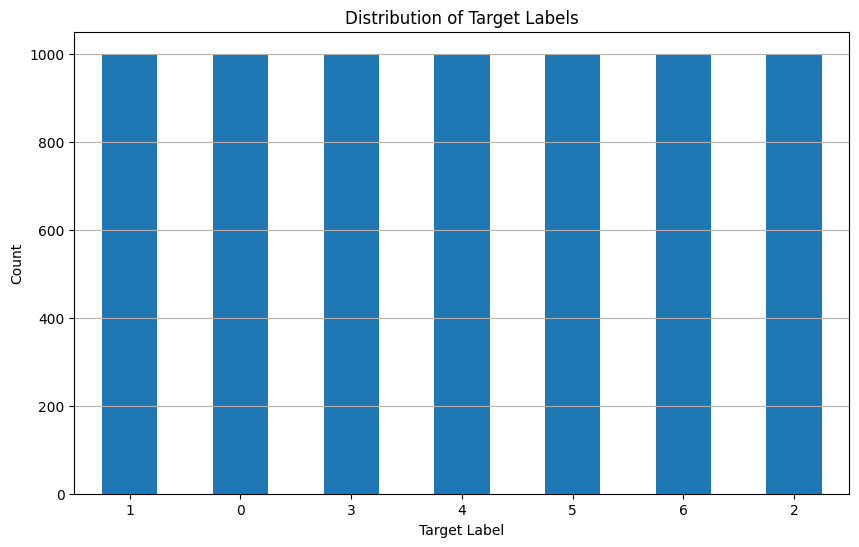

target
1    1000
0    1000
3    1000
4    1000
5    1000
6    1000
2    1000
Name: count, dtype: int64

In [4]:
import matplotlib.pyplot as plt

# Analyzing the distribution of the 'target' variable
target_distribution = data['target'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
target_distribution.plot(kind='bar')
plt.title('Distribution of Target Labels')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

target_distribution

# sort x label

The target labels in the dataset are evenly distributed, with each label (0 to 6) having exactly 1,000 instances. This is an ideal scenario for a classification task, as it indicates that the dataset is balanced with respect to the target labels. A balanced dataset helps in training a more accurate and unbiased model.

## Date Analysis

In [5]:
# Sampling texts for each label category for label consistency check

# Number of samples per label to inspect
samples_per_label = 5

# Sampling data
sampled_data = data.groupby('target').apply(lambda x: x.sample(samples_per_label)).reset_index(drop=True)

# Display the sampled data for manual inspection
sampled_data[['text', 'target']]


,text,target
0,갤럭시S9 본격 상륙…사전예약자 개통 개시,0
1,삼성 갤노트8 듀얼카메라 완성도 최고로 끌어올렸다,0
2,과기부 톈궁 1호 오늘 오전 9∼10시 남대서양 추락할 듯2보,0
3,한국스마트카드 고속버스모바일 앱 누적 다운로드 1천만,0
4,과기부 자체 TF 10개→2개로 대폭 축소…규제혁신 TF 출범,0
5,전월세 보증금 등 금융기관 보관…안심거래 상품 나온다,1
6,갤S8 예약판매 노트7 40만대 넘긴다…판촉 공세,1
7,KBS사장 인사청문…한국 땡문뉴스 비판·민주 균형보도 주문,1
8,MZ세대는 미래 고객…백화점들 취향 맞춰 속속 새단장,1
9,국민연금 삼성증권 주식 10.01% 보유,1


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_ngrams(corpus, n=None, ngrams=2):
    vec = CountVectorizer(ngram_range=(ngrams, ngrams)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_ngrams = words_freq[:n]
    
    top_ngrams_words = [i[0] for i in top_ngrams]
    top_ngrams_freqs = [i[1] for i in top_ngrams]

    sns.barplot(x=top_ngrams_freqs, y=top_ngrams_words)
    plt.title(f"Top {n} {ngrams}-grams")
    plt.xlabel("Frequency")
    

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set the Korean font
plt.rcParams['font.family'] = 'NanumGothic'  # Replace with the exact font name you found


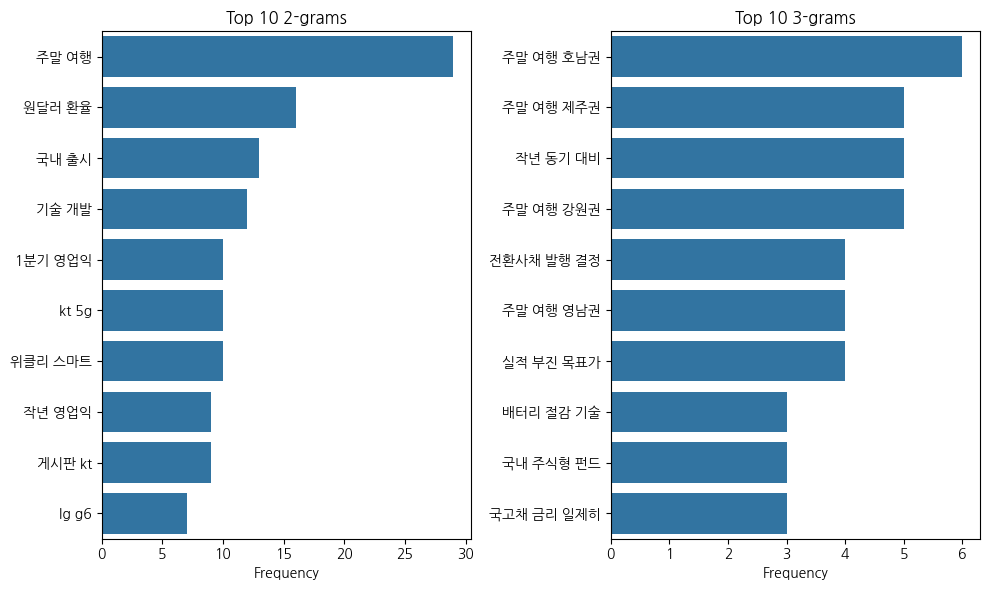

In [8]:
# Plotting the top 10 bi-grams and tri-grams
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_top_ngrams(data['text'], n=10, ngrams=2)

plt.subplot(1, 2, 2)
plot_top_ngrams(data['text'], n=10, ngrams=3)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the n-grams you want to analyze
ngrams_to_analyze = ['주말 여행', '원달러 환율', '국내 출시', '기술 개발']

# Create a CountVectorizer, considering only the specified n-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))  # Adjust ngram_range based on your n-grams
ngram_vectors = vectorizer.fit_transform(data['text'])

# Convert to DataFrame for easier manipulation
ngram_df = pd.DataFrame(ngram_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Filter the DataFrame to include only our n-grams of interest
ngram_df = ngram_df[ngrams_to_analyze]

# Add the target labels to this DataFrame
ngram_df['target'] = data['target']

# Group by 'target' and sum to get the frequency of each n-gram per label
label_association = ngram_df.groupby('target').sum()

# Display the association of n-grams with each label
print(label_association)

        주말 여행  원달러 환율  국내 출시  기술 개발
target                             
0           0       1     10     12
1           1      14      3      0
2           2       0      0      0
3          25       1      0      0
4           1       0      0      0
5           0       0      0      0
6           0       0      0      0


In [10]:
for ngrams_to_analyze in ['주말 N 여행', '원달러 환율', '국내 출시', '기술 개발', '분기']:
    for id, text in enumerate(data['text']):
        if ngrams_to_analyze in text:
            print(id, text, data['target'][id])
    print('------------------\n')

251 주말 N 여행 제주권 겨울 더 아름답다…온통 하얗게 덮인 눈 세상 올인∼ 3
408 주말 N 여행 크리스마스엔 달콤한 키스를…프라하의 연인이 되어볼까 3
821 주말 N 여행 호남권 달빛 벗 삼아 걸어라…한낮 폭염 피해 즐기는 꿀잼 야행 3
1034 주말 N 여행 제주권 만설 한라산…그 순수한 아름다움 속으로 4
1174 주말 N 여행 호남권 X마스 트리엔 사랑이 솔솔…스케이트·썰매장 씽씽 3
1573 주말 N 여행 호남권 섬진강 물길 따라 북상하는 매화 향기…임실에 왔다 3
2059 주말 N 여행 강원권 한그루 두그루 심은 대관령 황무지…평화의 음악숲 변신 3
2110 주말 N 여행 색다른 여름 여행…유럽 속살 살피는 미니멀 캠핑 3
2279 주말 N 여행 충청권 고소한 전어 통통하게 살 오른 대하…서해안은 축제 중 2
2786 주말 N 여행 영남권 노는 물이 다른 산행 겸한 봄철 여행지 고른다면… 3
2959 주말 N 여행 강원권 호반의 도시에서 스릴 넘치는 레저 묘미에 첨벙 1
2993 주말 N 여행 영남권 한복 입고 말 타고 노란 유채밭서 인생샷 찰칵 3
3616 주말 N 여행 충청권 53도 왕의 온천 수안보에 몸 담그니 피곤이 사르르∼ 3
3916 주말 N 여행 수도권 한국 속 작은 프랑스로 여행 떠나요 3
3965 주말 N 여행 제주권 성큼 다가온 봄…5일장 나들이 정말 괜찮아요 3
3991 주말 N 여행 강원권 눈·바람·추위…하늘이 만든 해장국의 황태자 황태 3
4636 주말 N 여행 초유의 폭설 제주…온 섬이 하얗게 뒤덮히다 3
4727 주말 N 여행 옆에선 연신 잡아올리는데…산천어 낚시 꽝치지 않는 비법은 2
4790 주말 N 여행 충청권 100만개 조명으로 변신한 칠갑산 알프스 얼음분수축제 3
4797 주말 N 여행 제주권 함덕해변 여름밤 달굴 음악의 향연 3
5073 주말 N 여행 호남권 세계가 인정한 명사십리…국내 첫 수질·안전 국제인증 3
5607 주말 N 여행 호남권 4차 산업혁명의 미래…미디어아트 예술의 눈으로 보다 3
568

# 사후 분석

In [11]:
# load csv
preds_valid = pd.read_csv('valid_output.csv')
preds_valid = preds_valid[['text', 'target', 'pred']]
preds_valid

,text,target,pred
0,여성과기인지원센터 여성 공학연구팀에 연구비 지원. 문 정부 4차산업혁명 밑그림 나왔...,2,2
1,광주시교육청 서울대·전남대·조선대 정시 지원 점수 분석. VR 영상 시청 후 일씨적...,2,2
2,朴대통령 한국은 자유무역의 확고한 지지자,6,6
3,전국 오전에 짙은 안개…낮에는 황사 통과로 미세먼지 나쁨,3,3
4,서울시 119구급차 AI스피커 시범운영…양천소방서KT 협업개발. 北당대회 美전문가들...,2,2
...,...,...,...
3595,테슬라 4분기 연속 흑자…국내 2차전지 업체 수혜 기대. KT삼성전자퀄컴 국쩨표준 ...,1,1
3596,영문운전면허증 발급 시작. 유엔 이스라엘군 팔레스타인 유혈 진압은 전쟁범죄종합,2,2
3597,이란 미국 핵합의 탈퇴에서 모든 혼란 비롯돼,4,4
3598,금 나노입자로 체세포→신경세포 전환…파킨슨병 치료 기대,0,0


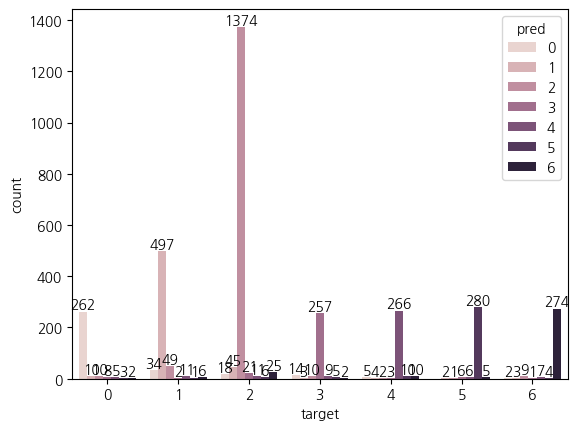

In [12]:
# visualize
import matplotlib.pyplot as plt
import seaborn as sns

# x=target, y=pred count, label sum
ax = sns.countplot(x='target', hue='pred', data=preds_valid)
for i in range(7):
    ax.bar_label(ax.containers[i], label_type='edge')

In [13]:
# get accuracy for each label
from sklearn.metrics import accuracy_score

for i in range(7):
    print(f'{i} accuracy: {accuracy_score(preds_valid["target"] == i, preds_valid["pred"] == i)}')
    counts = [sum((preds_valid["target"]==i) & (preds_valid["pred"] == j)) for j in range(7)]
    total = len(preds_valid[preds_valid["target"] == i])
    for idx, count in enumerate(counts):
        print(f'{i} -> {idx} accuracy: {count*100/total}')
    print("------------------\n")


0 accuracy: 0.9691666666666666
0 -> 0 accuracy: 87.33333333333333
0 -> 1 accuracy: 3.3333333333333335
0 -> 2 accuracy: 3.3333333333333335
0 -> 3 accuracy: 2.6666666666666665
0 -> 4 accuracy: 1.6666666666666667
0 -> 5 accuracy: 1.0
0 -> 6 accuracy: 0.6666666666666666
------------------

1 accuracy: 0.9527777777777777
1 -> 0 accuracy: 5.666666666666667
1 -> 1 accuracy: 82.83333333333333
1 -> 2 accuracy: 8.166666666666666
1 -> 3 accuracy: 0.3333333333333333
1 -> 4 accuracy: 1.8333333333333333
1 -> 5 accuracy: 0.16666666666666666
1 -> 6 accuracy: 1.0
------------------

2 accuracy: 0.9425
2 -> 0 accuracy: 1.2
2 -> 1 accuracy: 3.0
2 -> 2 accuracy: 91.6
2 -> 3 accuracy: 1.4
2 -> 4 accuracy: 0.7333333333333333
2 -> 5 accuracy: 0.4
2 -> 6 accuracy: 1.6666666666666667
------------------

3 accuracy: 0.9766666666666667
3 -> 0 accuracy: 4.666666666666667
3 -> 1 accuracy: 1.0
3 -> 2 accuracy: 3.3333333333333335
3 -> 3 accuracy: 85.66666666666667
3 -> 4 accuracy: 3.0
3 -> 5 accuracy: 1.666666666666

In [14]:
# wrong prediction
wrong_pred = preds_valid[preds_valid['target'] != preds_valid['pred']]
wrong_pred['text']

27                            갤S8 예약판매 노트7 40만대 넘긴다…판촉 공세
30                         뮤지컬 제작싸 한저나트센터 공연취소 피해액 뽀상하라종합
36                        게시판 과총 한·중 바이오 정책 협력 과학기술혁신정책포럼
40      권광석 우리은행장 백척간두 진일보…포스트 코로나 철저 준비. 스티커처럼 붙여요…KI...
49                          게시판 착한텔레콤 SKY서비스센터서 중고폰 매입·판매
                              ...                        
3533                          朴대통령 북핵 실질대비책 마련…北정권자멸 응징종합
3537                    베네수 정부 국경서 구호활동지원 英갑부 콘서트에 맞불 음악회
3545                              詩큐레이션 앱 시요일 이용자 10만명 돌파
3551                                   광주 북구 사랑의 동전모금함 개봉
3588                         檢 최순실에 35억 특혜지원 박상진 삼성 사장 소환
Name: text, Length: 390, dtype: object

In [15]:
# print id, text, target, pred
wrong_pred[['text', 'target', 'pred']]

# save csv
wrong_pred[['text', 'target', 'pred']].to_csv('wrong_pred.csv')

In [16]:
# IT과학(0), 경제(1), 사회(2), 생활문화(3), 세계(4), 스포츠(5), 정치(6)
label_dict = {0: 'IT과학', 1: '경제', 2: '사회', 3: '생활문화', 4: '세계', 5: '스포츠', 6: '정치'}
#convert integer labels to string labels
wrong_pred['target'] = wrong_pred['target'].replace(label_dict)
wrong_pred['pred'] = wrong_pred['pred'].replace(label_dict)


/tmp/ipykernel_226988/5283289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['target'] = wrong_pred['target'].replace(label_dict)
/tmp/ipykernel_226988/5283289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['pred'] = wrong_pred['pred'].replace(label_dict)


In [17]:
# count pair of target and pred
wrong_pred['pair'] = wrong_pred['target'] + '-' + wrong_pred['pred']
wrong_pred

/tmp/ipykernel_226988/3543571321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wrong_pred['pair'] = wrong_pred['target'] + '-' + wrong_pred['pred']


,text,target,pred,pair
27,갤S8 예약판매 노트7 40만대 넘긴다…판촉 공세,경제,IT과학,경제-IT과학
30,뮤지컬 제작싸 한저나트센터 공연취소 피해액 뽀상하라종합,사회,생활문화,사회-생활문화
36,게시판 과총 한·중 바이오 정책 협력 과학기술혁신정책포럼,사회,IT과학,사회-IT과학
40,권광석 우리은행장 백척간두 진일보…포스트 코로나 철저 준비. 스티커처럼 붙여요…KI...,사회,경제,사회-경제
49,게시판 착한텔레콤 SKY서비스센터서 중고폰 매입·판매,경제,IT과학,경제-IT과학
...,...,...,...,...
3533,朴대통령 북핵 실질대비책 마련…北정권자멸 응징종합,IT과학,정치,IT과학-정치
3537,베네수 정부 국경서 구호활동지원 英갑부 콘서트에 맞불 음악회,생활문화,세계,생활문화-세계
3545,詩큐레이션 앱 시요일 이용자 10만명 돌파,IT과학,생활문화,IT과학-생활문화
3551,광주 북구 사랑의 동전모금함 개봉,사회,생활문화,사회-생활문화


<Axes: ylabel='pair'>

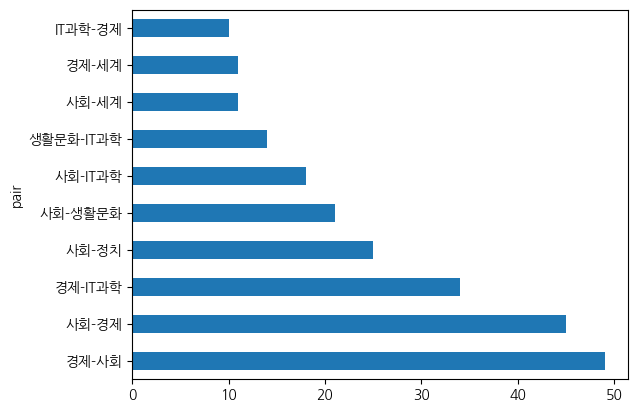

In [18]:
# plt.rcParams['font.family'] = 'NanumGothic'

# count pair
wrong_pred['pair'].value_counts()

# visualize top-10 pair
wrong_pred['pair'].value_counts()[:10].plot(kind='barh')

In [19]:
# print text if the pair is "경제-IT과학"
wrong_pred[wrong_pred['pair'] == '경제-IT과학']['text']

27              갤S8 예약판매 노트7 40만대 넘긴다…판촉 공세
49            게시판 착한텔레콤 SKY서비스센터서 중고폰 매입·판매
493              차세대 안테나 개발 지원…미래부 7개 업체 선정
574                 페이코 금융 탭 신설…간편금융 플랫폼 표방
821           기술·글로벌·소상공인 방점…네이버 역대 최대 투자종합
982            페이스북 메신저 대화창에 광고 붙인다…새 돈줄 될까
1063        삼성전자 BMW 드라이빙센터에 투명OLED 비디오월 설치
1099             KT 미구게 데이터 센터 구축…하반기 확때 예정
1137                  SK텔레콤 5월 갤S8 구매 혜택 풍성
1174         LG유플러스 협력사 제안의 날 개최…아이디어 9건 채택
1254             카카오택시 1천원 유료호출만으론 수요 해결 불가
1302              페이스북 SKB·LGU와도 망 사용계약 맺을까
1373              다산네트웍스 伊 람보르기니와 IT합작법인 설립
1391    KISA 전자상거래 등 ICT 분쟁조정 상담번호 118로 일원화
1422                블랙보리 출시 2년만에 9천만병 판매 돌파
1475              통신사 주파수 경매 기싸움 최장 8일 걸릴 듯
1512      SKT 천재 해커 CEO 영입…인공지능 연구 누구나 설립종합
1583           아이폰8 다음달 3일 국내 출시…27일부터 예약판매
1625             현대모비스 자율주행차 엠빌리 전세계 도로 달린다
1696       카카오게임즈 블루홀 개발 MMORPG 에어 국내 판권 확보
1786          LG G6 출시 첫 주말…대목 맞은 신도림 테크노마트
1952             삼성전자 삼성페이에 쇼핑·포인트 적립 기능 추가
1999             여기어때 안심예약제로 중복예

In [20]:
wrong_pred[wrong_pred['pair'] == 'IT과학-경제']['text']

156            스마트폰 평균 메모리 中 비보가 삼성의 이배종합
216           달라진 아파트 청약시장…통장 아끼고 무순위 노린다
321        기업은행 법인카드 1장당 최대 100명 간편결제 서비스
736          G6 내놓은 LG전자 모바일 직원 7분기 만에 증원
1160           SK CC 롯데손해보험 전산시스템 AI로 고도화
1338      삼성 스마트폰 중국 점유율 3% 반토막…토종브랜드에 밀려
2297          3분기 스팸신고 불법게임·도박 1위…휴대폰판매도↑
2586         팬택 IoT 등 경쟁력 있는 사업에 매진…추가 감원
2931    권봉서 골해 올레드 외에 나노셀 프리미엄 LCD 티비도 주력
3170              중국발 증설 러시…반도체 치킨게임 재연되나
Name: text, dtype: object

In [21]:
# print all text if the target is "사회"

# To display all columns
pd.set_option('display.max_columns', None)

# To display all rows
pd.set_option('display.max_rows', None)

wrong_pred[wrong_pred['target'] == '사회']

,text,target,pred,pair
30,뮤지컬 제작싸 한저나트센터 공연취소 피해액 뽀상하라종합,사회,생활문화,사회-생활문화
36,게시판 과총 한·중 바이오 정책 협력 과학기술혁신정책포럼,사회,IT과학,사회-IT과학
40,권광석 우리은행장 백척간두 진일보…포스트 코로나 철저 준비. 스티커처럼 붙여요…KI...,사회,경제,사회-경제
51,5억원 무이자 융자는 되고 7천만원 이사비는 안된다. SK CC 롯데손해보험 전산시...,사회,경제,사회-경제
54,현대차 고성능 에네 천 모델 벨로스터 엔. 플라스틱으로 냉장고 천 개발…여름옷 소재...,사회,경제,사회-경제
84,이이녕 검찰개혁뻐반 빠른시간 내 완수…野 통큰 결단 바란다,사회,정치,사회-정치
95,젊은 혈관 면역학자 정철호를 기억하며,사회,IT과학,사회-IT과학
112,해외서 산 요트타고 권총 밀반입…출입국 관리 구멍,사회,세계,사회-세계
120,셀러비 넘처나는 시대…셀러브 너떠케 생겨나고 소비되는가,사회,생활문화,사회-생활문화
179,평창대관령음악제 오늘 개막…강원에 펼쳐질 젊은 클래식,사회,생활문화,사회-생활문화
